## Make_dataset

* Task를 샘플링한다.
    * A는 0.5 ~ 2의 범위, B와 C는 1 ~ 3의 범위
    * 총 Task는 20개
    * 각 Task별로 5000개의 데이터를 사용한다.

In [3]:
import numpy as np
import pyDOE
import matplotlib.pyplot as plt

## Governing equation
def func1(x,y,a=1,b=1,c=1):
    return a*np.sin(b*x)*np.sin(c*y)

## Task sampling
Task_sampling = pyDOE.lhs(3, samples=20)
A_sampling = 0.5+(Task_sampling.T[0])
B_sampling = 0.5+(Task_sampling.T[1])*1.5
C_sampling = 0.5+(Task_sampling.T[2])*1.5
Task_sampling = np.stack([A_sampling,B_sampling,C_sampling],axis=1)

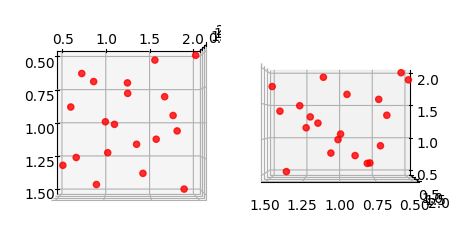

In [4]:
# Creating figure
color_list = ["red", "blue", "green"]
# Creating plot
fig = plt.figure(figsize=(10,3))
wf = fig.add_subplot(111, projection='3d')
x = Task_sampling.T[0]
y = Task_sampling.T[1]
f = Task_sampling.T[2]
wf.scatter3D(x, y, f, color = "r", alpha=0.8)
wf.view_init(90, 0)

wf = fig.add_subplot(122, projection='3d')
x = Task_sampling.T[0]
y = Task_sampling.T[1]
f = Task_sampling.T[2]
wf.scatter3D(x, y, f, color = "r", alpha=0.8)
wf.view_init(0, 90)
plt.show()

In [5]:
for idx, Task in enumerate(Task_sampling):
    # 각 Task 별로 -pi ~ pi 사이의 (x,y) 데이터 5000개 생성
    sample_data = pyDOE.lhs(2, samples=5000)
    sample_data -= 0.5
    sample_data *= 2 * np.pi
    result = np.array([func1(i[0],i[1],a=Task[0],b=Task[1],c=Task[2]) for i in sample_data])
    train_data = np.concatenate([sample_data, result[:,None]], axis=1)
    with open(f'./data/train_{str(Task[0])}_{str(Task[1])}_{str(Task[2])}_.npy', 'wb') as f:
        np.save(f, train_data)
    f.close()